In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "./data/"
df_train = pd.read_csv(data_path + "train.csv")
df_test = pd.read_csv(data_path + "test.csv")

# drop id
df_train.drop('id', axis=1, inplace=True)

df_train['date'] = pd.to_datetime(df_train['date'])

df_train.head(10)

,date,country,store,product,num_sold
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88
6,2017-01-01,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98
7,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win Friends and Influence People,14
8,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win More Kaggle Competitions,83
9,2017-01-01,Argentina,Kaggle Store,Using LLMs to Write Better,69


In [2]:
df_train['day'] = df_train['date'].dt.day
df_train['month'] = df_train['date'].dt.month
df_train['year'] = df_train['date'].dt.year

In [3]:
# split into train and validation
from sklearn.model_selection import train_test_split

X = df_train[['year', 'month', 'day', 'country', 'store', 'product']]
y = df_train['num_sold']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


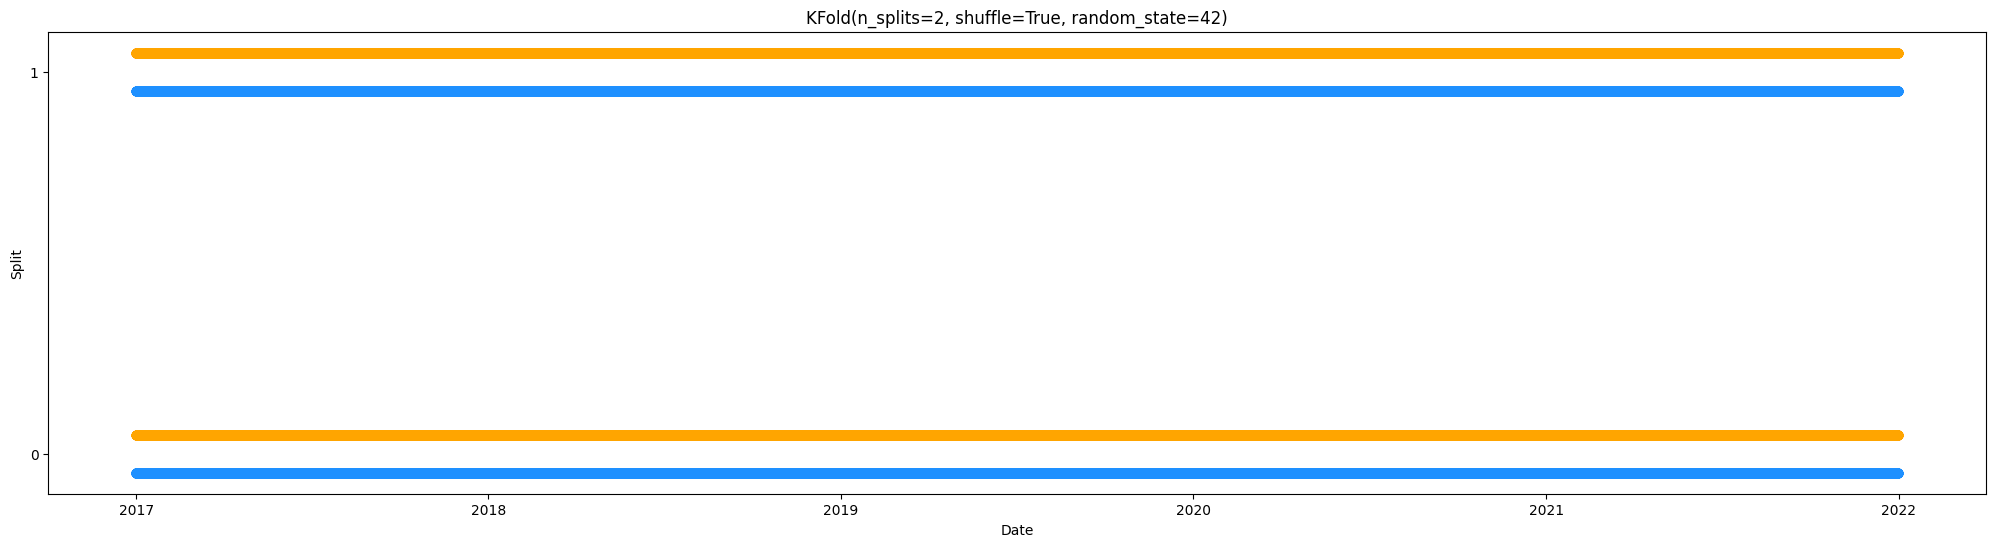

In [88]:
import pandas as pd
from sklearn.model_selection import KFold

def plot_kfold_split(df, kfold_function, n_splits, title):
    # create a visualisation of the kfold_function split between train and test
    fig, ax = plt.subplots(figsize=(25, 6))
    df['split'] = 'None'
    for i, (train_index, test_index) in enumerate(kfold_function.split(df)):
        
        train_dates = df.iloc[train_index]['date']
        test_dates = df.iloc[test_index]['date']

        ax.plot(train_dates, i * np.ones(len(train_index))-0.05, 'o', alpha=0.5, color='dodgerblue', label=f'Split {i} train')
        ax.plot(test_dates, i * np.ones(len(test_index))+0.05, 'o', alpha=0.5, color='orange', label=f'Split {i} test')

    #plt.legend()
    
    # show y ticks as integers
    from matplotlib.ticker import MaxNLocator
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.xlabel("Date")
    plt.ylabel("Split")
    plt.title(title)
    plt.show()

n_splits = 2

cv = KFold(n_splits=2, shuffle=True, random_state=42)
cv2 = KFold(n_splits=2, shuffle=False)
plot_kfold_split(df_train, cv, n_splits, f"KFold(n_splits=2, shuffle=True, random_state=42)")

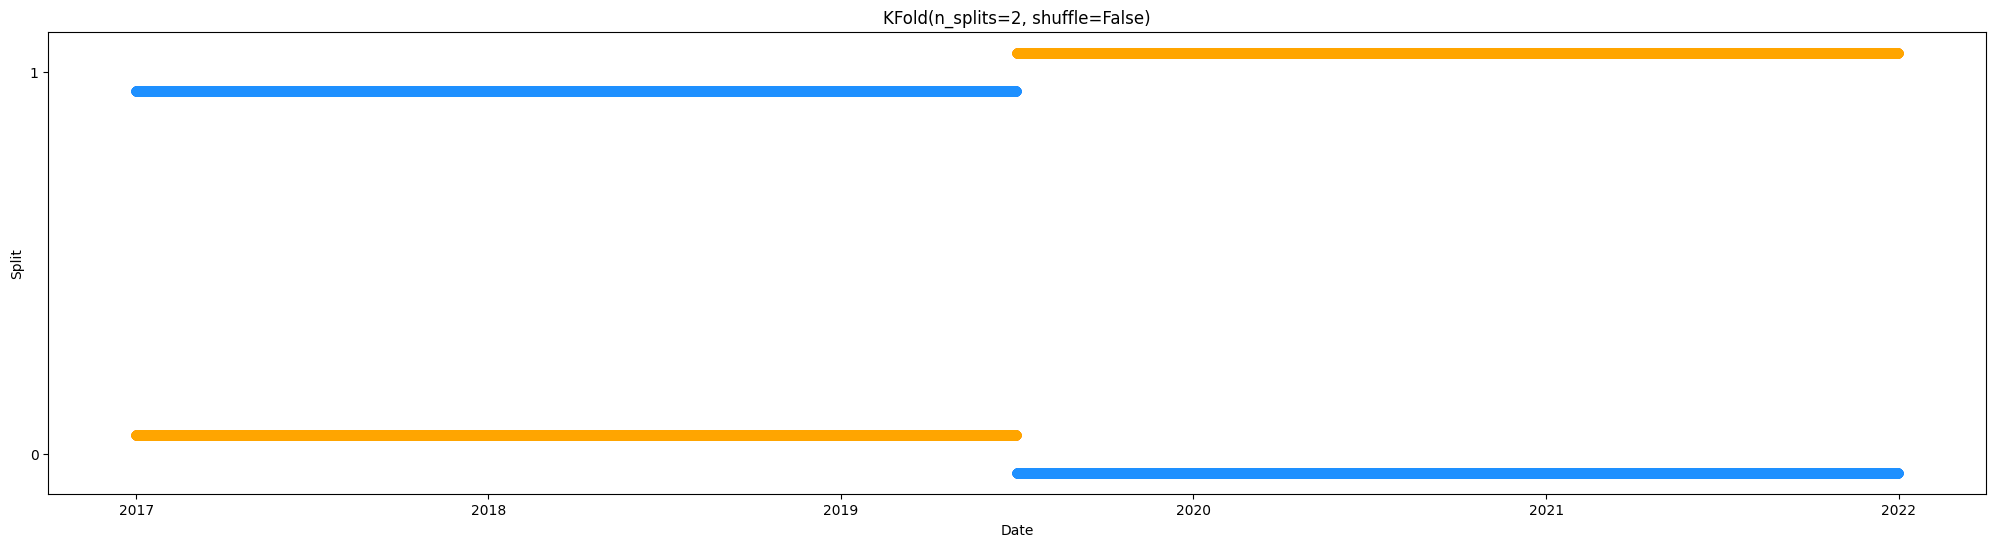

In [89]:
plot_kfold_split(df_train, cv2, n_splits, f"KFold(n_splits=2, shuffle=False)")

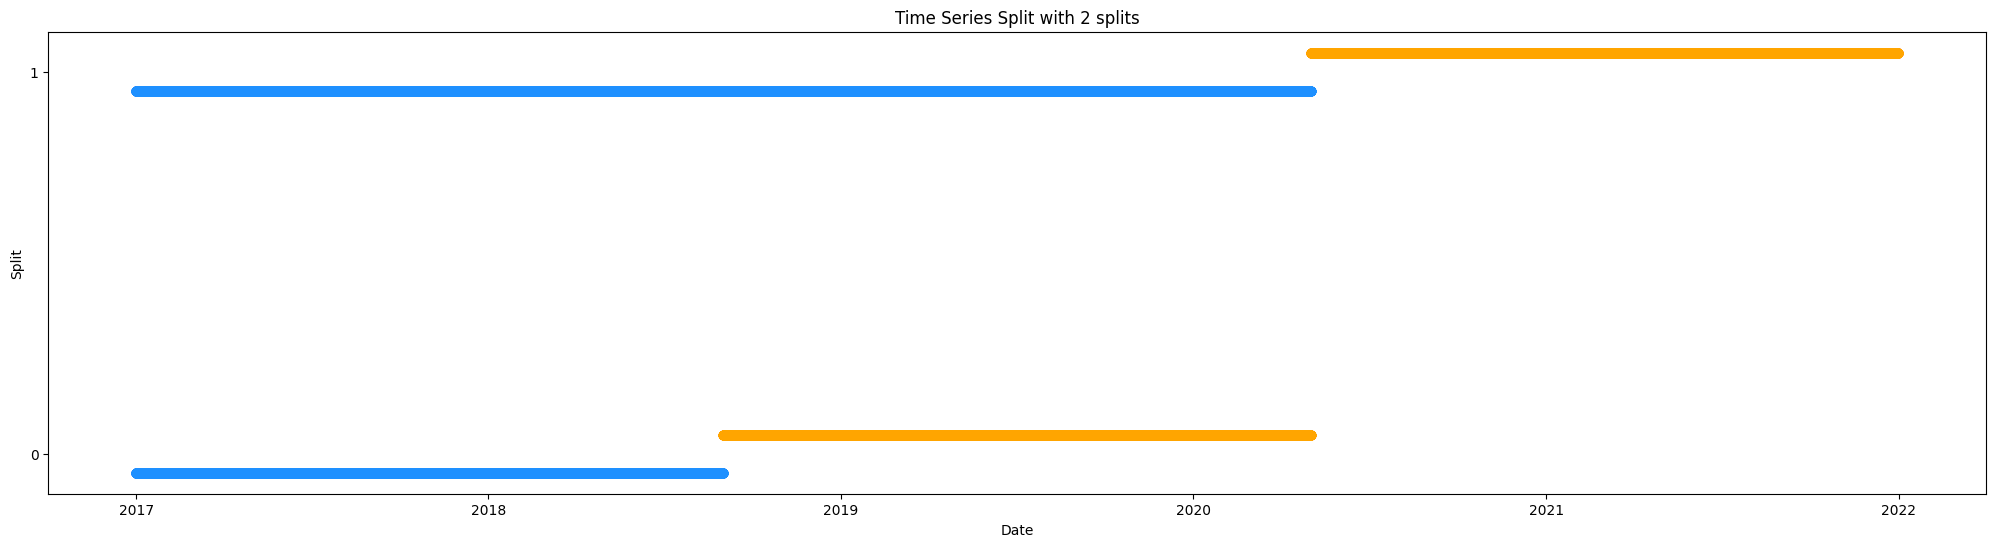

In [90]:
from sklearn.model_selection import TimeSeriesSplit

plot_kfold_split(df_train, TimeSeriesSplit(n_splits=n_splits), n_splits, f'Time Series Split with {n_splits} splits')

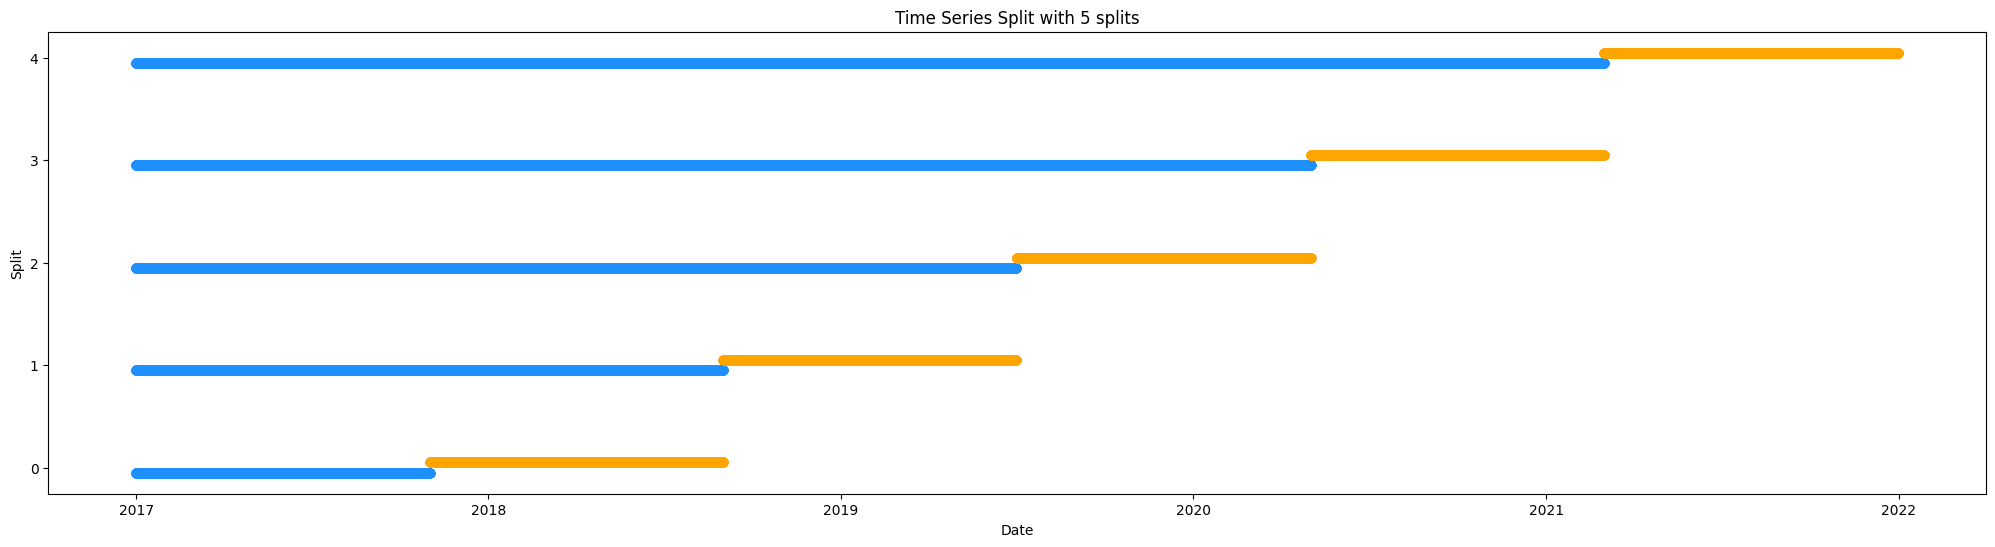

In [91]:
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5
plot_kfold_split(df_train, TimeSeriesSplit(n_splits=n_splits), n_splits, f'Time Series Split with {n_splits} splits')